In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [87]:
df = pd.read_csv('hello.csv')
df_pw = pd.read_csv('hello_pw.csv')
df= pd.concat([df,df_pw],axis=1)
display(df.head(4))
loss= (800007-df['instructions'].sum())/800007
print("Lost {} instructions of 800007 {:.3f}%".format(800007-df['instructions'].sum(), loss*100))

,time,instructions,cache_ll,branch_instructions,branch_misses,energy-cores,energy-pkg,energy-ram
0,10012516,72617,13,18154,0,0.609711,0.918457,0
1,20054697,81961,1,20491,0,0.169479,0.271271,0
2,30147506,84856,2,21212,0,0.268524,0.370483,0
3,40229510,84825,1,21205,0,0.302734,0.404572,0


Lost 134 instructions of 800007 0.017%


/home/vitor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


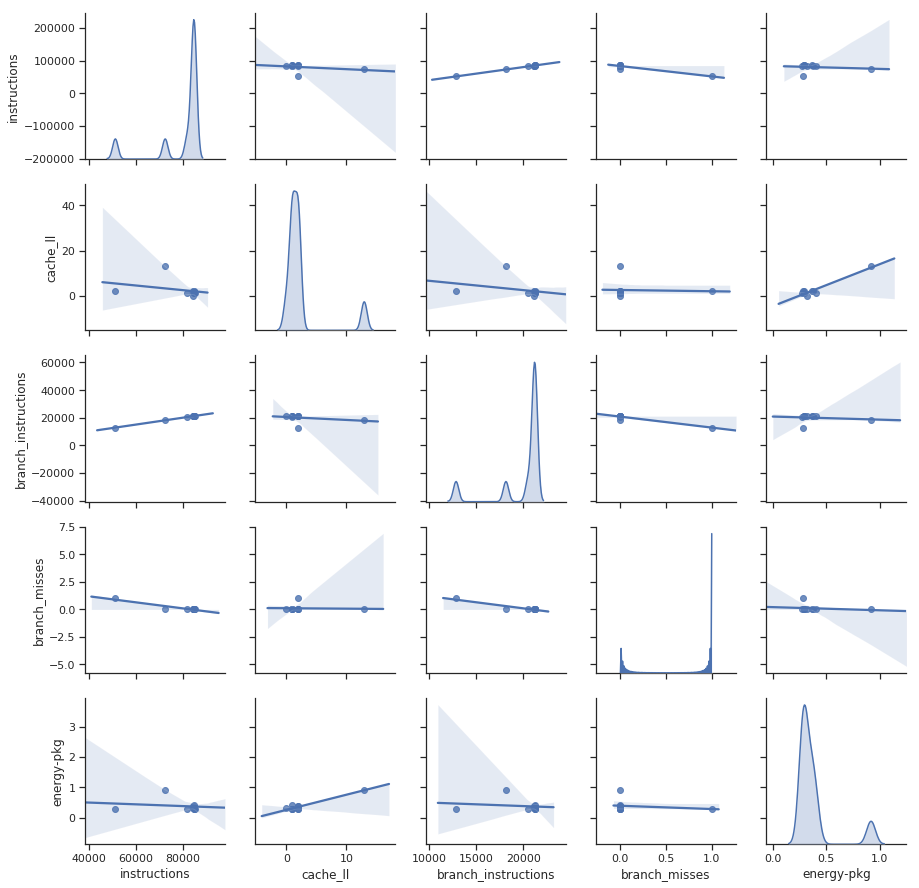

In [88]:
g = sns.pairplot(df, vars=["instructions", "cache_ll", "branch_instructions", "branch_misses", "energy-pkg"], kind="reg", diag_kind="kde")

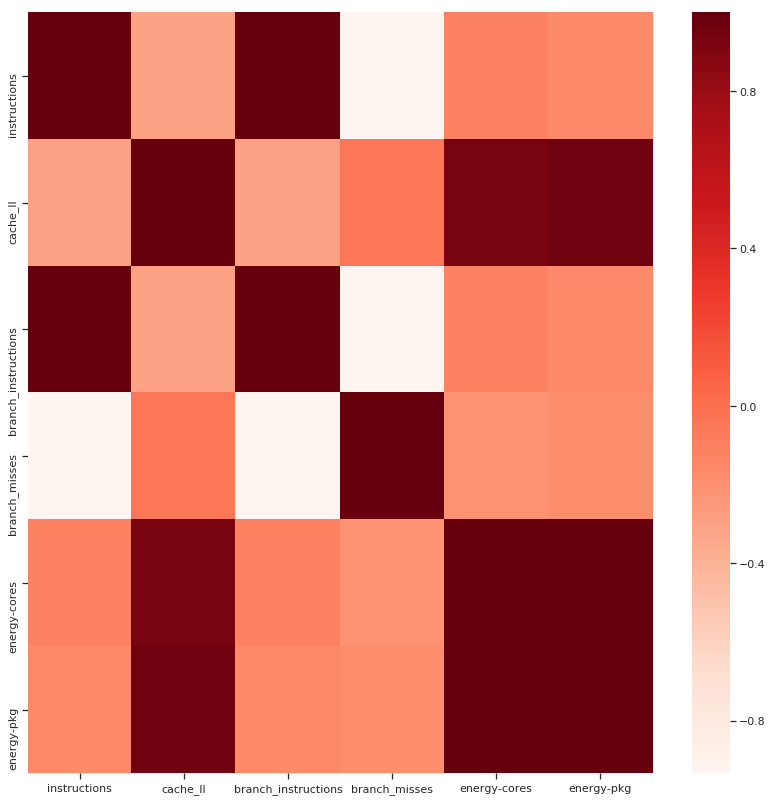

In [89]:
fig, ax= plt.subplots(figsize=(14,14))
s=list(df.columns)
s.remove('time')
s.remove('energy-ram')
corr= df[s].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,ax=ax,cmap='Reds')

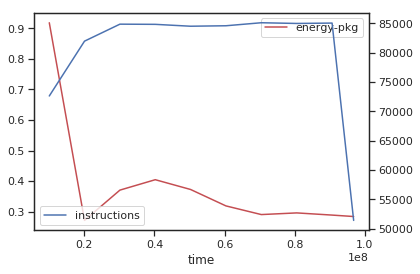

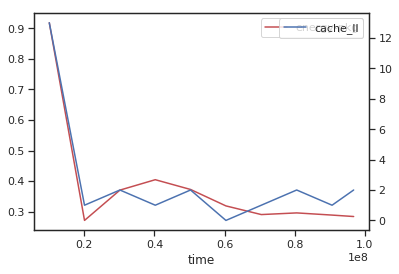

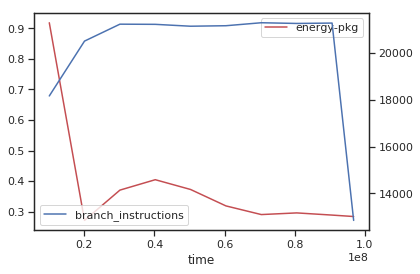

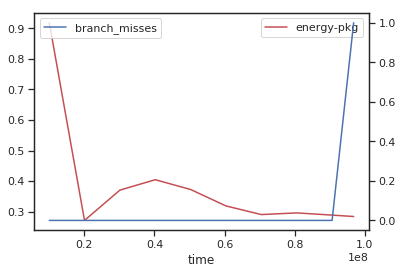

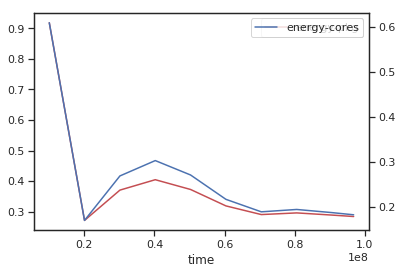

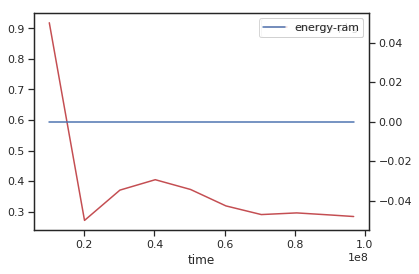

In [90]:
for t in df.columns:
    if t == 'time' or t == 'energy-pkg':
        continue
    fig, ax1 = plt.subplots()
    df.plot(x='time',y='energy-pkg',ax=ax1,c='r')
    ax2= ax1.twinx()
    df.plot(x='time',y=t,ax=ax2)